<a href="https://colab.research.google.com/github/ZeusCobian/Practica2_TI/blob/main/TI_1_Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2

**Nombre:** Gutierrez Cobian Zeus Emanuel

**e-mail:** zeus.gutierrez0065@alumnos.udg.mx

## MODULES

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from plotly.subplots import make_subplots
import plotly.graph_objects as go


from scipy.stats import wrapcauchy
from scipy.stats import levy_stable

## CLASSES

In [27]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
import math

class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions"""
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y=None):
        if y is None:
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y

    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    def __repr__(self):
        return f"Vec2d({self.x}, {self.y})"
    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)

    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)

    # rotate vector
    def rotated(self, angle):
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

## Actividad 1: Lévy distribution - N Curves (3 pts)

* Generar al menos las 4 curvas de distribución timpo Lévy stable que se observan en la imagen.
* Visualizar con **plotly**.

* Parametros m = 3.0, Levy_exponent = x, beta = 0

In [3]:
#parametros de las curvas de Levy
alphas = [0.1, 0.5, 1.0, 1.9]
beta = 0
m = 3.0

#figura de Plotly
fig = go.Figure()

# Ajusta el rango de x para las curvas
x = np.linspace(-10, 10, 400)

# Genera las curvas para cada alpha
for alpha in alphas:
    y = levy_stable.pdf(x, alpha, beta, scale=m)
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name=f'Alpha = {alpha}'))


fig.update_layout(
    title='Distribuciones Lévy Stable para Diferentes Alpha',
    xaxis_title='X',
    yaxis_title='Densidad de Probabilidad',
    legend_title='Valor de Alpha'
)


fig.show()

## Actividad 2: Lévy distribution - Histogram + Curve (4 pts)

* A partir de un conjunto de valores aleatorios extraidos de una distribución tipo Lévy stable, obtener su histograma y comparar con la curva correspondiente PDF.
* Visualizar con **matplotlib**.

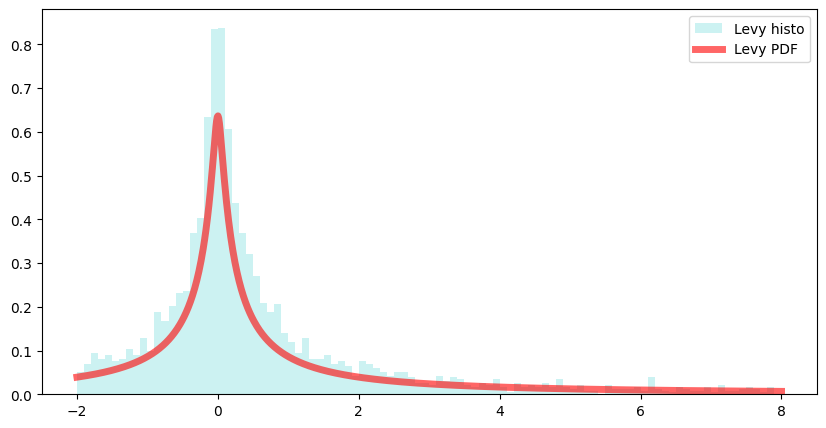

In [ ]:
# Parametros para la distribución de Levy stable
alpha = 0.5
beta = 0
loc = 0
scale = 1
sample_size = 3500  # Tamaño de la muestra

#valores aleatorios distribución de Levy stable
r = levy_stable.rvs(alpha, beta, loc, scale, size=sample_size)

#figura y el eje para el plot
fig, ax = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(10)

# Histograma
ax.hist(r, bins=100, density=True, histtype='stepfilled', alpha=0.2, color='c', range=(-2, 8), label='Levy histo')

# PDF para un rango adecuado
aux_domain = np.linspace(-2, 8, 1000)
levy_pdf = levy_stable.pdf(aux_domain, alpha, beta, loc, scale)
ax.plot(aux_domain, levy_pdf, 'r-', lw=5, alpha=0.6, label='Levy PDF ')


ax.legend(loc='best', frameon=True)

plt.show()


este código es para visualizar la distribución de Lévy stable, generando un conjunto de valores aleatorios y comparándolos con su curva de densidad de probabilidad (PDF) correspondiente.
A diferencia del código de ejemplo proporcionado por el profesor, que utilizaba la distribución de Weibull para ilustrar un concepto similar, aquí use específicamente la distribución de Lévy stable.
El histograma se ajusta para mostrar la densidad (normalizado) en lugar de contar los números puros, y se configura con un rango específico de -2 a 8 esto para que se vea lo mas parecido a la imagen del archivo PDF que se no dio para la practica.

## Actividad 3: Lévy ﬂight - Vec2d - 1 Trajectory (6 pts)

* Utilizar **Vec2d**.
* Guardar trayectorias en **Pandas** Data Frame.
* Visualizar proyección en 3d con **plotly**.

In [29]:
def levy_flight(steps, alpha=1.5):
    # Generar ángulos y pasos
    angles = 2 * np.pi * np.random.rand(steps)
    step_sizes = levy_stable.rvs(alpha, 0, scale=1, size=steps)  # Utilizar distribución de Levy stable

    # Inicializar trayectoria
    trajectory = [Vec2d((0, 0))]

    # Generar trayectoria
    for i, step in enumerate(step_sizes):
        angle = angles[i]
        displacement = Vec2d((np.cos(angle) * step, np.sin(angle) * step))
        trajectory.append(trajectory[-1] + displacement)

    return trajectory

# Generar trayectoria de vuelo de Levy
steps = 1000
trajectory = levy_flight(steps)

# Guardar trayectoria en DataFrame de pandas
df = pd.DataFrame([(vec.x, vec.y) for vec in trajectory], columns=['x', 'y'])

# Añadir índice como 'z' para la visualización en 3D
df['z'] = df.index

# Visualizar trayectoria en 3D con Plotly
fig = go.Figure(data=[go.Scatter3d(x=df['x'], y=df['y'], z=df['z'], mode='lines', marker=dict(size=4))])
fig.update_layout(title='Levy Flight - Trayectoria 3D', scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Paso'))
fig.show()


## Actividad 4: Correlated Random Walk - Vec2d - N Trajectories (7 pts)

* Generar tantas trayectorias tipo CRW como se especifique en una variable **n_traj**.
* Cada una de las trayectorias debera tener un coeficiente de Cauchy diferente.
* Utilizar **Vec2d**.
* Guardar trayectorias en **Pandas** Data Frame.
* Visualizar proyección en 3d con **plotly**.
* Exportar el Data Frame con las trayectorias a un archivo tipo *pkl*.